In [1]:
import spotipy
import pandas as pd
from spotipy.oauth2 import SpotifyClientCredentials
import json


with open("credentials.json") as infile:
        auth = json.load(infile)
        client_id = auth["client_id"]
        client_secret = auth["client_secret"]

spotify = spotipy.Spotify(client_credentials_manager=SpotifyClientCredentials(client_id=client_id, client_secret=client_secret))

artist_name = []
track_name = []
track_popularity = []
artist_id = []
track_id = []
energy = []
instrumentalness = []
key = []
tempo = []
time_sig = []
valence = [] # How happy a song is??? SO COOL
dancebility = []
acousticness = []
artists_and_tracks = []
year = []

In [2]:
count = 0
stupid_tracks = 0
iterations = 0
curr_year = 2017
popularity_level = ""
for j in range(5):
    curr_year += 1
    year_string = str(curr_year)
    for i in range(0,1000,50):
        track_results = spotify.search(q='genre:pop year:{}'.format(year_string), type='track', limit=50,offset=i)
        for i, t in enumerate(track_results['tracks']['items']):
            f = spotify.audio_features(t['id'])
            f = f[0] # this does not work with live recordings
            artists_id = t['artists'][0]['id']
            track_names = t['name']
            artist_and_track = artists_id + track_names # made an attribute that adds the id and track name together
            if f and (t['popularity'] > 0) and (artist_and_track not in artists_and_tracks) and (t["album"]["artists"][0]["name"] != "Various Artists"): # checks if popularity is greater than 0 and if the song is already in the dataset
                year.append(curr_year)
                artist_name.append(t['artists'][0]['name'])
                artist_id.append(t['artists'][0]['id'])
                track_name.append(t['name'])
                track_id.append(t['id'])
                energy.append(f['energy'])
                instrumentalness.append(f["instrumentalness"])
                key.append(f["key"])
                tempo.append(f["tempo"])
                time_sig.append(f["time_signature"])
                valence.append(f["valence"])
                dancebility.append(f["danceability"])
                acousticness.append(f["acousticness"])
                artists_and_tracks.append(artist_and_track)
            else:
                stupid_tracks+= 1
        iterations += 1
        
        

track_df = pd.DataFrame({'artist_name' : artist_name, 'year': year, 'track_name' : track_name, 'track_id' : track_id, 
                         'popularity' : track_popularity, 'artist_id' : artist_id,
                         'energy': energy, 'instrumentalness': instrumentalness,
                         'key': key, 'tempo': tempo, 'time_sig': time_sig, 'valence': valence,
                         'danceability': dancebility, 'acousticness': acousticness})

ValueError: All arrays must be of the same length

In [20]:
track_df["year"].value_counts()

2018    954
2019    942
2020    887
2022    876
2021    854
Name: year, dtype: int64

In [19]:
print(track_df["valence"].count())
print(stupid_tracks)

4513
487


In [21]:
track_df.corr()

,year,track_popularity,energy,instrumentalness,key,tempo,time_sig,valence,danceability,acousticness
year,1.000000,0.259942,0.073506,-0.054127,-0.003749,0.026239,-0.004987,0.065375,0.023556,-0.073461
track_popularity,0.259942,1.000000,0.031659,-0.047107,-0.002231,0.006370,-0.018465,0.026651,0.077525,-0.013891
energy,0.073506,0.031659,1.000000,-0.130629,0.034788,0.150932,0.162382,0.398387,0.132598,-0.652042
instrumentalness,-0.054127,-0.047107,-0.130629,1.000000,0.006821,-0.011433,-0.019323,-0.078657,-0.120915,0.131142
key,-0.003749,-0.002231,0.034788,0.006821,1.000000,0.004434,0.032147,0.035365,0.035261,-0.004122
tempo,0.026239,0.006370,0.150932,-0.011433,0.004434,1.000000,-0.005634,0.065944,-0.101019,-0.144972
time_sig,-0.004987,-0.018465,0.162382,-0.019323,0.032147,-0.005634,1.000000,0.124060,0.183330,-0.159923
valence,0.065375,0.026651,0.398387,-0.078657,0.035365,0.065944,0.124060,1.000000,0.409811,-0.233917
danceability,0.023556,0.077525,0.132598,-0.120915,0.035261,-0.101019,0.183330,0.409811,1.000000,-0.184338
acousticness,-0.073461,-0.013891,-0.652042,0.131142,-0.004122,-0.144972,-0.159923,-0.233917,-0.184338,1.000000


In [37]:
converter = lambda x: "Not Very Popular" if (x < 65) else "Popular"
track_df["popularity_level"] = track_df["track_popularity"].apply(converter)

In [38]:
track_df["popularity_level"].value_counts()

Somewhat Popular    1955
Popular             1838
Very Popular         720
Name: popularity_level, dtype: int64

In [ ]:
track_df["popularity_level"]

In [40]:
track_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4513 entries, 0 to 4512
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist_name       4513 non-null   object 
 1   year              4513 non-null   int64  
 2   track_name        4513 non-null   object 
 3   track_id          4513 non-null   object 
 4   track_popularity  4513 non-null   int64  
 5   artist_id         4513 non-null   object 
 6   energy            4513 non-null   float64
 7   instrumentalness  4513 non-null   float64
 8   key               4513 non-null   int64  
 9   tempo             4513 non-null   float64
 10  time_sig          4513 non-null   int64  
 11  valence           4513 non-null   float64
 12  danceability      4513 non-null   float64
 13  acousticness      4513 non-null   float64
 14  popularity_level  4513 non-null   object 
dtypes: float64(6), int64(4), object(5)
memory usage: 529.0+ KB


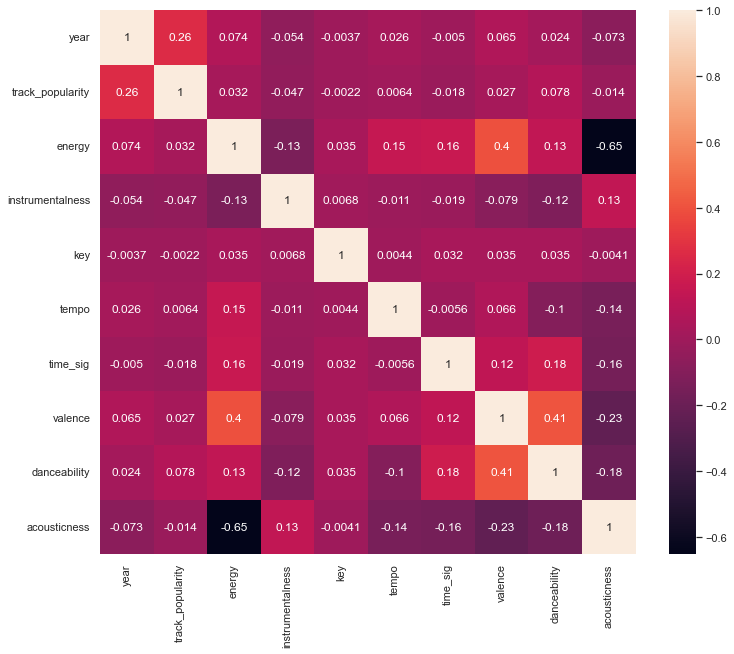

In [41]:
import seaborn as sn
import matplotlib.pyplot as plt
sn.set(rc = {'figure.figsize':(12,10)})
sn.heatmap(track_df.corr(), annot=True)
plt.show()

In [42]:
print(track_df["track_popularity"].mean())

66.75182805229338


(array([ 101.,  689.,  900., 1177.,  669.,  531.,  279.,  106.,   46.,
          15.]),
 array([50. , 54.6, 59.2, 63.8, 68.4, 73. , 77.6, 82.2, 86.8, 91.4, 96. ]),
 <BarContainer object of 10 artists>)

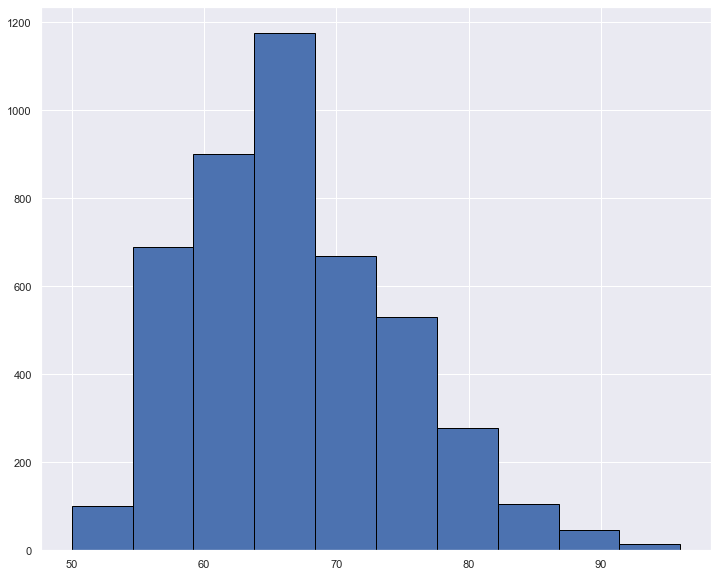

In [43]:
import matplotlib.pyplot as plt

plt.hist(track_df["track_popularity"], bins=10, edgecolor = "black")

In [44]:
track_df.to_csv("af1.csv")